<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020_projects/blob/main/Machine_Learning_Clustering_Gabriela_Pacek_2020_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriela Pacek

Analyzed enzymes: BSS (benzyl succinate synthase) isoforms, isolated from various bacteria. 

Data source: brenda-enzymes

Analyzed parameters: molecular weight, number of amino acids, microorganisms and some structure features - domains, position of glycyl radical.

Parameters: amino acids and mass combined into parameter_1, domains starting and ending positions + glycil radical location number combined into the second parameter -> thus enabling a 2D clustering

Method: clustering

Code was written with a lot of help from the following sites:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Plotting-a-Dendrogram
https://github.com/marcinwolter/MachineLearning2020/blob/main/plot_linkage_comparison.ipynb
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

Stack overflow


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lk
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
url = 'https://raw.githubusercontent.com/Gabriela-Pacek/ML_project/main/ML_database_final.csv'
df = pd.read_csv(url)
print(df.head())
enz=df.values
print(enz[0:4])

         ENTRY NAME '             'ORGANISM '  ...  'BssB_TutG'  Unnamed: 9
0        BSSA_THAAR '    'Thauera aromatica '  ...            0         NaN
1        BSSB_THAAR '    'Thauera aromatica '  ...            1         NaN
2        BSSC_THAAR '    'Thauera aromatica '  ...            0         NaN
3      W8SQ38_ECOLX '     'Escherichia coli '  ...            0         NaN
4  A0A1C9UK74_9PROT '  'Magnetospirillum sp '  ...            0         NaN

[5 rows x 10 columns]
[["BSSA_THAAR '" "'Thauera aromatica '" 861 97736 825 40 712 1 0 nan]
 ["BSSB_THAAR '" "'Thauera aromatica '" 74 8752 0 0 0 2 1 nan]
 ["BSSC_THAAR '" "'Thauera aromatica '" 57 6619 0 0 0 3 0 nan]
 ["W8SQ38_ECOLX '" "'Escherichia coli '" 810 90124 786 11 682 1 0 nan]]


In [ ]:
enz_array=np.array(enz[:245,[2,3,4,5,6,7,8]])
print(enz_array)
aa_mass=enz_array[:,[0,1]]
am_combined=aa_mass.astype(int)
#print(am_combined)
am_scaled= sklearn.preprocessing.scale(am_combined)
#print(am_scaled[0])
for i in am_scaled:
  average_aa_m=sum(am_scaled[:,[0]],am_scaled[:,[1]])/2
  print(average_aa_m)
print(len(average_aa_m))

enz_scaled = sklearn.preprocessing.scale(enz_array)
#print(enz_scaled)

In [ ]:
domains=enz_array[:,[2,3,4,5,6]]

d=domains.astype(float)
d_scaled= sklearn.preprocessing.scale(d)
for i in d_scaled:
  average_domain=((d_scaled[:,[0]]+d_scaled[:,[1]]+d_scaled[:,[2]]+d_scaled[:,[3]]+d_scaled[:,[4]])/5)
  
  #print(average_domain)
print(average_domain.shape)
print(average_aa_m.shape)

(245, 1)
(245, 1)


In [ ]:
print(enz_scaled.shape)
combined_parameters=np.column_stack((average_aa_m,average_domain))

print(combined_parameters.shape)


(245, 7)
(245, 2)


In [ ]:
combined_parameters_scaled=sklearn.preprocessing.scale(combined_parameters)

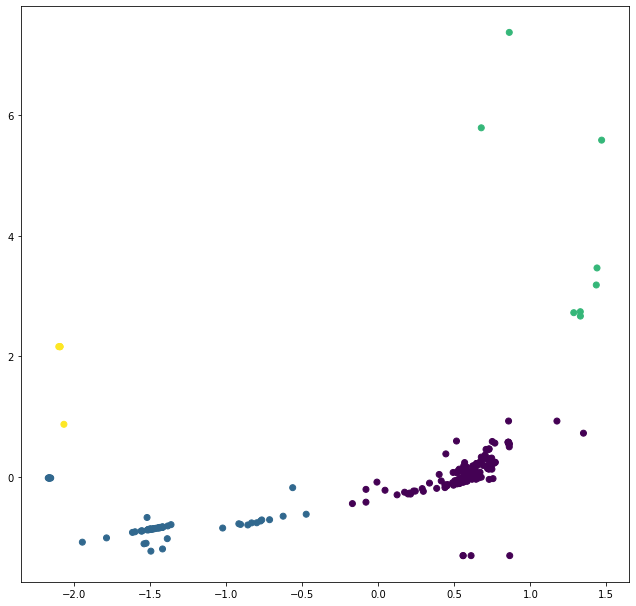

In [ ]:
%matplotlib inline

plt.figure(figsize=(24, 36))

n_samples = 245
random_state = 20
#X, y = make_blobs(n_samples=n_samples, random_state=random_state, n_features=7)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=100, max_iter=1000, random_state=50)
kmeans.fit(enz_scaled)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(combined_parameters_scaled)

plt.subplot(321)
plt.scatter(combined_parameters_scaled[:,0], combined_parameters_scaled[:,1], c=y_pred)
plt.show()

     aa_and_mass  domains_combined  Cluster
0       0.853071         -0.511808        1
1      -0.899391          2.216551        0
2      -1.718509          1.638061        0
3       0.504576         -0.442955        1
4      -0.138492         -0.000165        1
..           ...               ...      ...
240     0.866426         -0.494964        1
241     0.876879         -0.486726        1
242     0.873468         -0.483444        1
243     0.875200         -0.485110        1
244     0.506255         -0.444570        1

[245 rows x 3 columns]


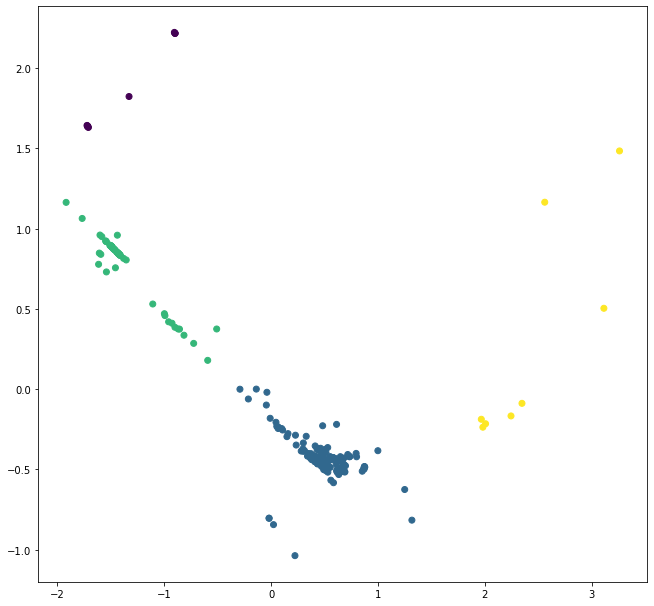

In [ ]:
transformation = [[0.79, -0.76], [0.35, 0.29]]
combined_parameters_aniso = np.dot(combined_parameters_scaled, transformation)
y_pred = KMeans(n_clusters=4, random_state=50).fit_predict(combined_parameters_aniso)
plt.figure(figsize=(24, 36))
plt.subplot(324)
plt.scatter(combined_parameters_aniso[:,0], combined_parameters_aniso[:,1], c=y_pred)
df = pd.DataFrame(combined_parameters_aniso, columns=['aa_and_mass', 'domains_combined'])
y = kmeans.fit_predict(df[['aa_and_mass', 'domains_combined']])

df['Cluster'] = y
print(df)

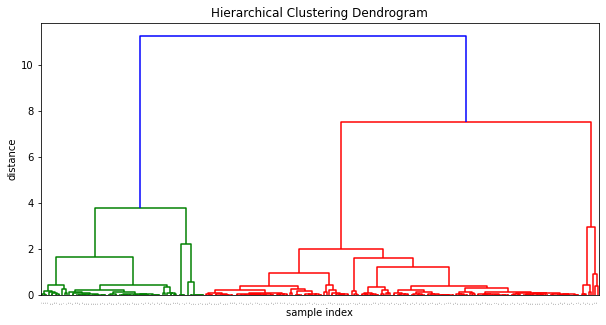

In [ ]:
WARD=lk(combined_parameters, 'ward')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    WARD,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

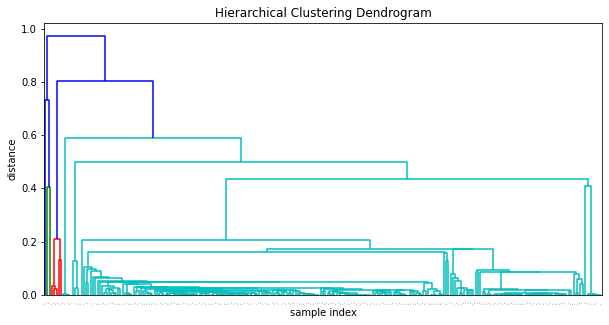

In [ ]:

#single linkage 
SINGLE_LINKAGE=lk(combined_parameters, 'single')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    SINGLE_LINKAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

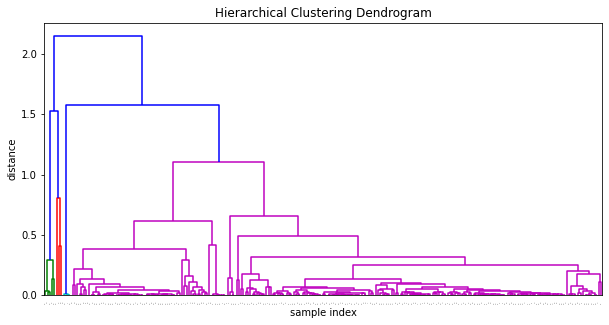

In [ ]:
AVERAGE=lk(combined_parameters, 'average')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    AVERAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()